In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df[['Survived','Embarked']].sort_values(by='Survived',ascending=True)

,Survived,Embarked
881,0,S
16,0,Q
18,0,S
20,0,S
24,0,S
...,...,...
8,1,S
889,1,C
874,1,C
875,1,C


1. family_label
    How: Extract last name from Name, label encode it
    Why: Passengers with same last name likely traveled together → survival correlation
2. family_size
    How: Count passengers sharing the same family_label
    Why: Group size adds context — solo travelers vs. big families may have different survival odds
3. title
    How: Extract title from Name (e.g., Mr, Mrs, Dr, etc.), label encode
    Why: Title hints at gender, age, and social class — all likely tied to survival
4. age_group
    How:
        Impute missing Age using median age per title
        Bin age into categories: e.g., child (0–13), teen, adult
    Why: Age range affects rescue priority (children first), and binning simplifies patterns for the model
🔄 Feature Interaction Flow
→ title
→ used to impute missing age
→ used to categorize into age_group
→ can also help refine family_size logic if needed later
You're not just creating features — you're building a feature pipeline with dependencies and meaning.

## Data prep

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Title,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,Other,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN,Mr,0


In [24]:
df['Age_Category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age_Category
Non-Null Count  Dtype  
--------------  -----  
102 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [ ]:
#df.drop('Age_Category',axis=1,inplace=True)

In [22]:
df.loc[df['Age']<10,'Age_Category']=0

In [23]:
df.loc[df['Age'].isna()&df['Title'].isin(['Master','Miss']),'Age_Category']=0

In [14]:
df['Title']=df['Name'].str.split(",").str[1].str.split(".").str[0].str.strip()

In [17]:
df['Title'].value_counts()

Title
Mr        523
Miss      185
Mrs       126
Master     40
Other       9
Noble       8
Name: count, dtype: int64

In [16]:
df.loc[(df['Title'] == "Dr")&(df['Sex'] == "male"), 'Title'] = "Mr"
df.loc[(df['Title'] == "Dr")&(df['Sex'] == "female"), 'Title'] = "Mrs"
df.loc[df['Title']=='Jonkheer','Title']='Other'
df.loc[df['Title']=='Major','Title']='Noble'
df.loc[df['Title']=='Don','Title']='Other'
df.loc[df['Title']=='Rev','Title']='Other'
df.loc[df['Title']=='Col','Title']='Noble'
df.loc[df['Title']=='Lady','Title']='Noble'
df.loc[df['Title']=='Sir','Title']='Noble'
df.loc[df['Title']=='Mlle','Title']='Miss'
df.loc[df['Title']=='Mme','Title']='Noble'
df.loc[df['Title']=='Ms','Title']='Miss'
df.loc[df['Title']=='Capt','Title']='Other'
df.loc[df['Title']=='the Countess','Title']='Noble'

#127 and 523

In [18]:
df['Family_size']=df['SibSp']+df['Parch']

In [19]:
df.loc[(df['Family_size']==1)|( df['Family_size']==2)|(df['Family_size']==3),'Family_size']=1
df.loc[df['Family_size']>3,'Family_size']=2

In [27]:
df = df.fillna({'Age_Category': 1})

In [30]:
df = df.fillna({'Embarked': 'C'})

In [39]:
deck_map = {
    'A': 100, 'B': 200, 'C': 300, 'D': 400,
    'E': 500, 'F': 600, 'G': 700, 'T': 800
}

def cabin_to_number(cabin):
    if pd.isna(cabin):
        return 0
    
    cabin = cabin.split()[0]
    letter = cabin[0]
    num_part = cabin[1:] if len(cabin) > 1 else ""
    
    base = deck_map.get(letter, 0)
    
    if num_part.isdigit():
        num = int(num_part)
        
        if len(num_part) == 1:
            num *= 10
        elif len(num_part) == 3 and num_part.startswith("1"):
            num = int(num_part[:2])  # takes first two digits only
        
        return base + num
    else:
        return base

df["cabin_number"] = df["Cabin"].apply(cabin_to_number)


In [57]:
df["fare_bin"] = pd.qcut(df["Fare"], q=12, labels=False, duplicates="drop")

In [59]:
clean_df=df

In [60]:
cat_drop=['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin']
clean_df.drop(cat_drop,axis=1,inplace=True)
clean_df

,Survived,Pclass,Sex,Embarked,Age_Category,Title,Family_size,cabin_number,fare_bin
0,0,3,male,S,1.0,Mr,1,0,0
1,1,1,female,C,1.0,Mrs,1,385,10
2,1,3,female,S,1.0,Miss,0,0,3
3,1,1,female,S,1.0,Mrs,1,312,10
4,0,3,male,S,1.0,Mr,0,0,3
...,...,...,...,...,...,...,...,...,...
886,0,2,male,S,1.0,Other,0,0,5
887,1,1,female,S,1.0,Miss,0,242,8
888,0,3,female,S,0.0,Miss,1,0,7
889,1,1,male,C,1.0,Mr,0,314,8


In [47]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Title,Family_size,cabin_number,fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,Mr,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,Mrs,1,385,8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,Miss,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,Mrs,1,312,8
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,Mr,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.0,Other,0,0,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,Miss,0,242,7
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,Miss,1,0,6
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0,Mr,0,314,7


## Visualization

<Axes: xlabel='fare_bin', ylabel='count'>

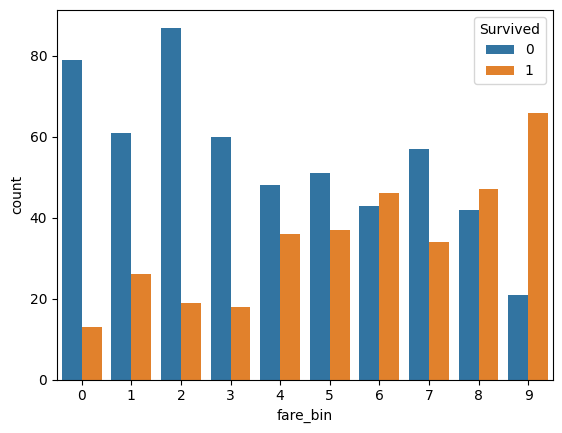

In [ ]:
sns.countplot(data=df,x='fare_bin',hue='Survived')#10

<Axes: xlabel='fare_bin', ylabel='count'>

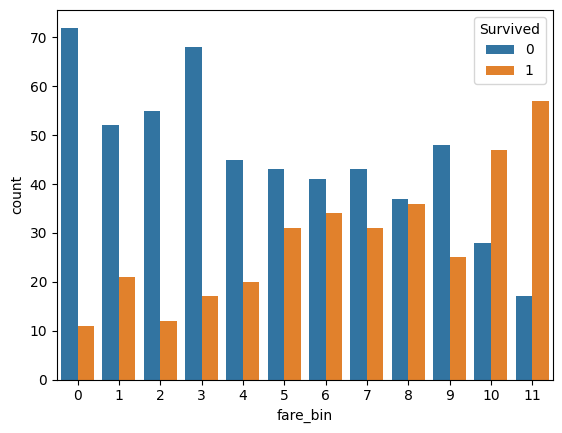

In [50]:
sns.countplot(data=df,x='fare_bin',hue='Survived')#12

<Axes: xlabel='cabin_number', ylabel='Survived'>

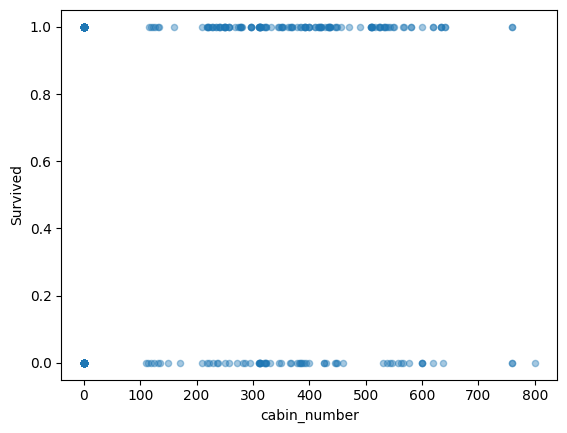

In [41]:
df.plot(kind='scatter',x='cabin_number',y='Survived',alpha=0.4)

<Axes: xlabel='cabin_number', ylabel='count'>

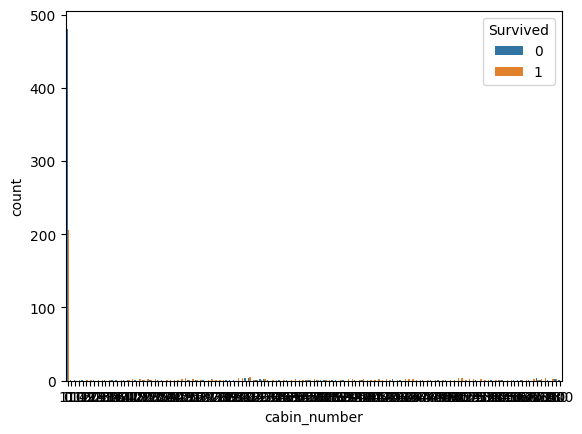

In [42]:
sns.countplot(data=df,x='cabin_number',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

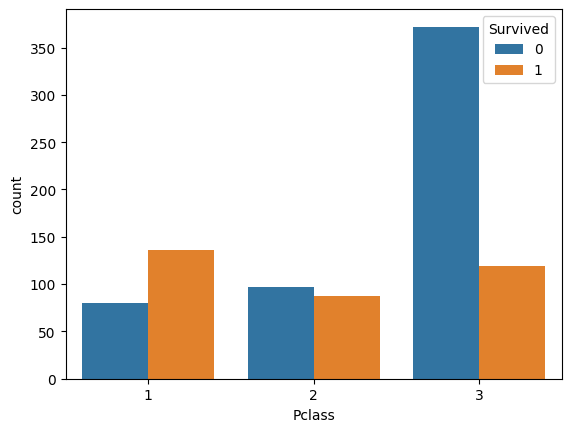

In [4]:
sns.countplot(data=df,x='Pclass',hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

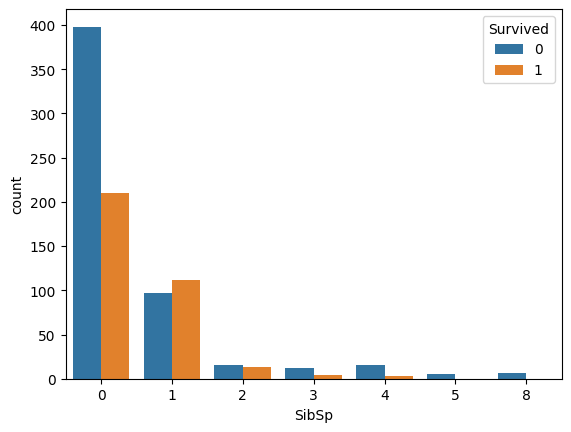

In [5]:
sns.countplot(data=df,x='SibSp',hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

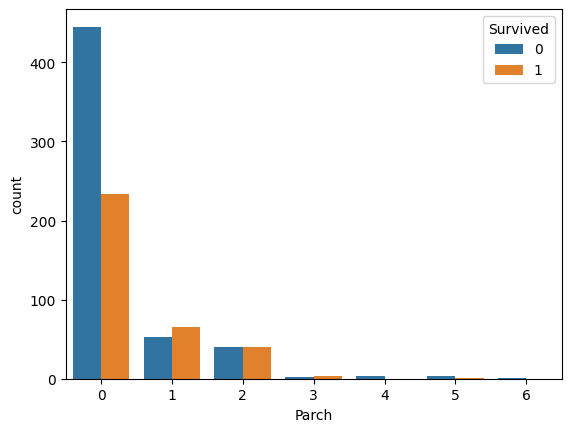

In [6]:
sns.countplot(data=df,x='Parch',hue='Survived')

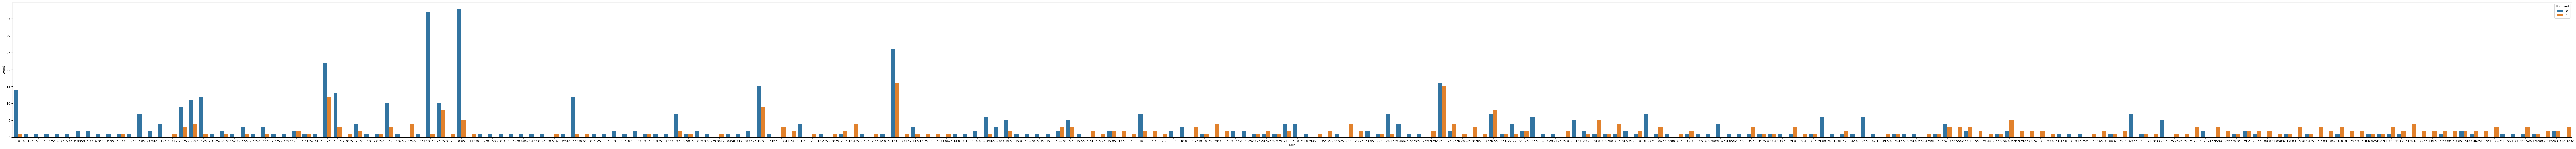

In [45]:
plt.figure(figsize=(150,8))
sns.countplot(data=df,x='Fare',hue='Survived')
plt.savefig("Fare.png",dpi=100)
plt.show()

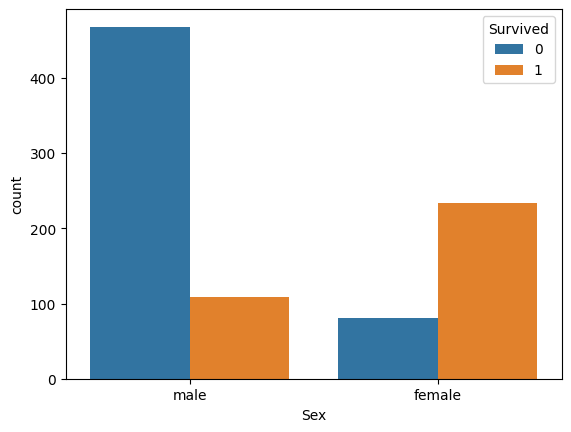

In [8]:
#sns.pairplot(df[['Age','Survived']])
#'line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin'
sns.countplot(data=df,x='Sex',hue='Survived')
plt.show()

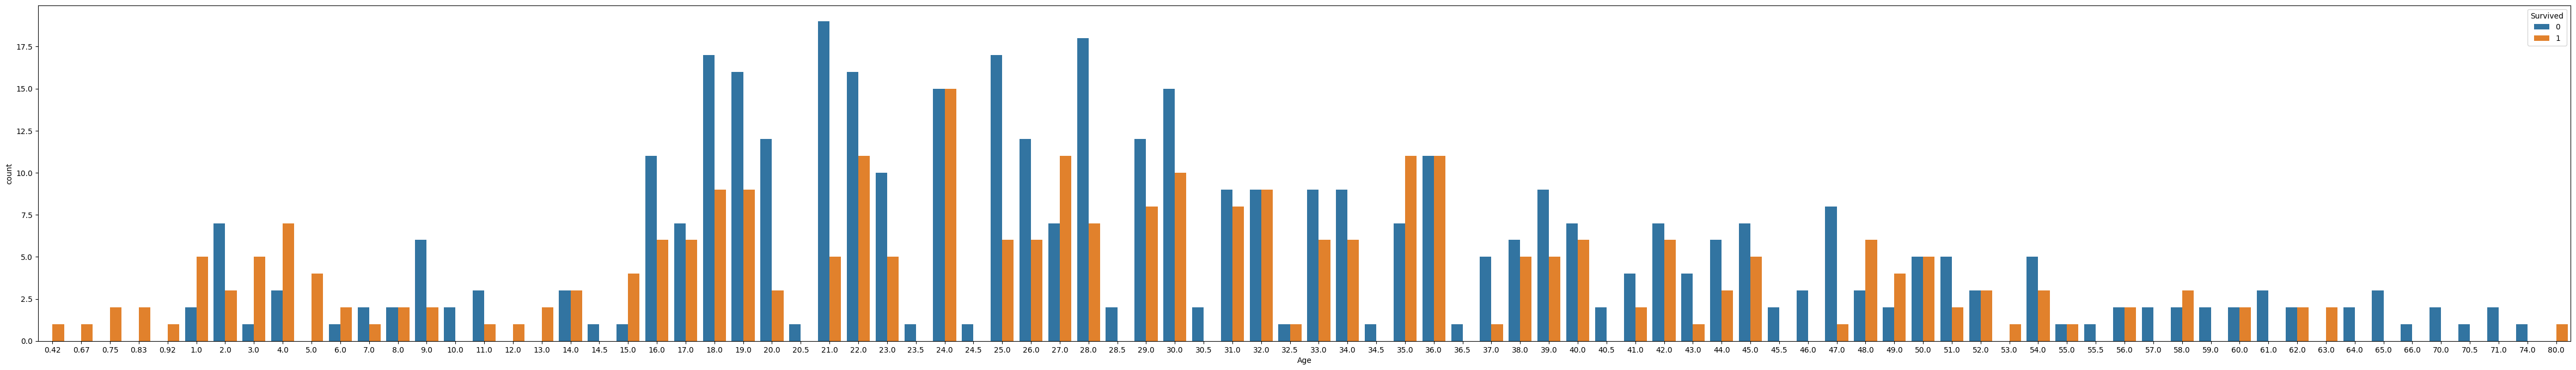

In [43]:
plt.figure(figsize=(60,8))
sns.countplot(data=df,x='Age',hue='Survived')
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

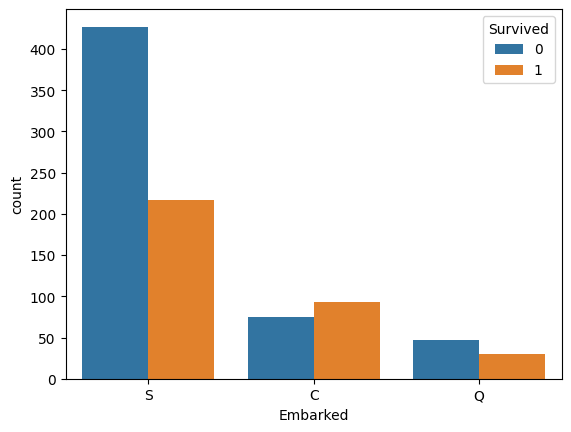

In [10]:
sns.countplot(data=df,x='Embarked',hue='Survived')


<Axes: xlabel='Title', ylabel='count'>

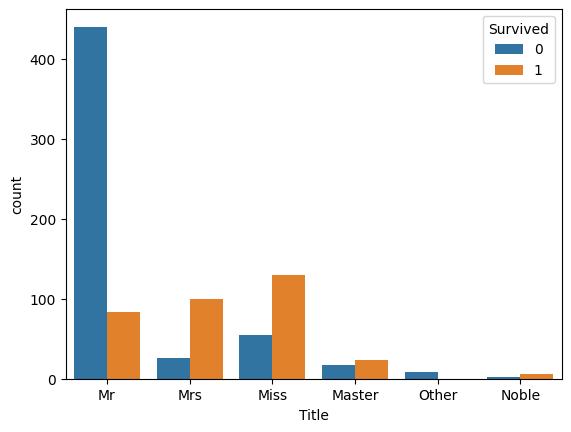

In [26]:
sns.countplot(data=df,x='Title',hue='Survived')

<Axes: xlabel='Family_size', ylabel='count'>

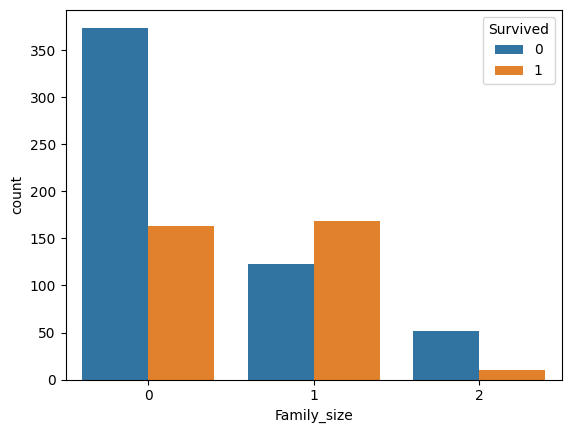

In [ ]:
sns.countplot(data=df,x='Family_size',hue='Survived')

<Axes: xlabel='Age_Category', ylabel='count'>

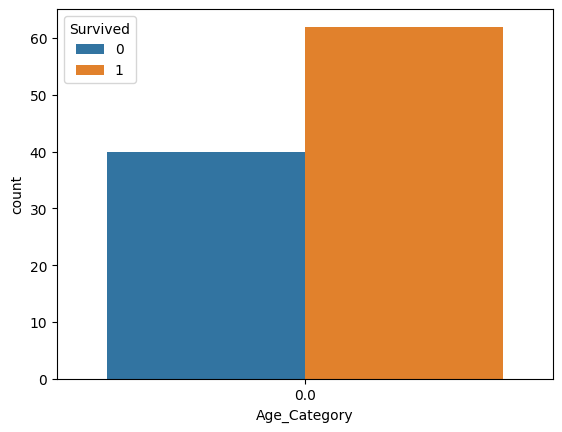

In [ ]:
sns.countplot(data=df,x='Age_Category',hue='Survived')

<Axes: xlabel='Age_Category', ylabel='count'>

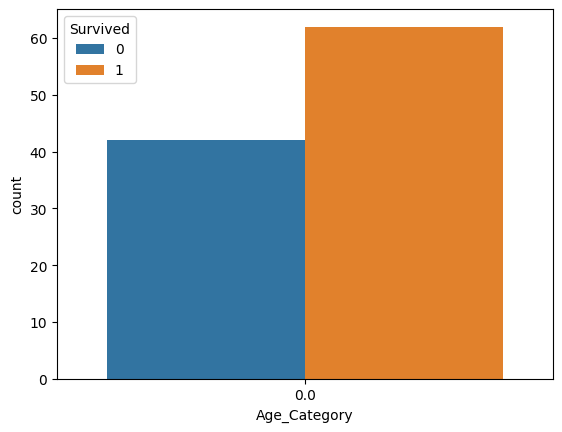

In [ ]:
sns.countplot(data=df,x='Age_Category',hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

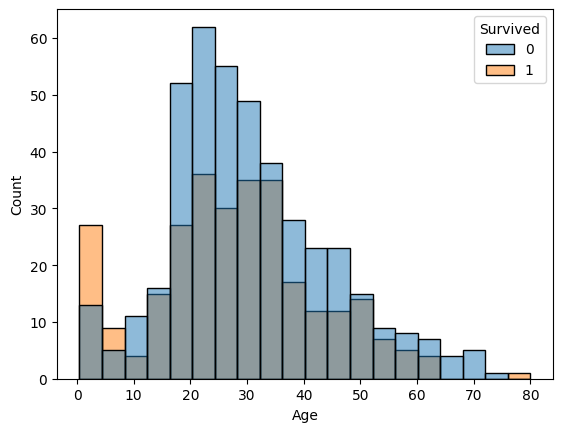

In [ ]:
sns.histplot(data=df,x='Age',hue='Survived')

## Data rep

in family size
0 mean solo - high rate of daeth
1 mean 1-3 family size- survival kinda high
2 for over 4 and 4 - again more death

gpt complimented me lessgo

age category 0 means child less than 10